<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/%5B20250506%5D%20Trust%20FL%20MLP-LSTM_logged_extended%20on%20WSN-BFSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trust FL MLP-LSTM_logged_extended on WSN-BFSF

In [1]:
# trust_federated_mlp_lstm_logged_extended.py

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, InputLayer
from keras.regularizers import l2
from keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from scipy.spatial.distance import cosine

In [2]:
# Load dataset
dataset = pd.read_csv("dataset.csv")  # WSN-BFSF 4-class dataset
dataset = dataset.dropna()  # Remove missing values

In [3]:
dataset

,Event,Time,S_Node,Node_id,Rest_Energy,Trace_Level,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,Class
0,1,0.100000,79,79,600.000000,5,0,79.255,1.255,48,30,1,1,100,0,79,4,0
1,2,0.100963,78,78,599.979723,5,800,79.255,1.255,48,30,1,1,100,0,79,4,0
2,2,0.100963,76,76,599.979722,5,800,79.255,1.255,48,30,1,1,100,0,79,4,0
3,2,0.100964,75,75,599.979722,5,800,79.255,1.255,48,30,1,1,100,0,79,4,0
4,2,0.100964,118,118,599.979722,5,800,79.255,1.255,48,30,1,1,100,0,79,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312101,4,656.526536,140,140,465.332078,5,800,140.255,1.255,48,30,1,31,100,16,140,68,1
312102,4,657.209643,140,140,465.191806,5,800,140.255,1.255,48,30,1,33,100,16,140,72,1
312103,4,657.891729,140,140,465.051737,5,800,140.255,1.255,48,30,1,35,100,16,140,76,1
312104,4,658.574656,140,140,464.911501,5,800,140.255,1.255,48,30,1,37,100,16,140,80,1


In [4]:
# Encode non-numeric columns (if any)
for column in dataset.columns:
    if dataset[column].dtype == 'object':  # Identify categorical columns
        dataset[column] = LabelEncoder().fit_transform(dataset[column])

# Separate features (X) and target (y)
X = dataset.drop(['Class'], axis=1)  # Assuming 'Class' is the target column
y = dataset['Class']

print("Original Class Distribution:", np.bincount(y))

Original Class Distribution: [262851  11766   7645  29844]


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler # Import StandardScaler here
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Verify the balanced dataset distribution
print("Balanced Class Distribution:", np.bincount(y))

Balanced Class Distribution: [262851 262851 262851 262851]


In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [8]:
pip install matplotlib

In [9]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, TimeDistributed
from tensorflow.keras.regularizers import l2
import numpy as np

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step
Round 1
Accuracy: 0.67876318, Precision: 0.67992396, Recall: 0.67876318, F1-Score: 0.67531642
Confusion Matrix:
[[31679 12050  8379   462]
 [15186 24991  9422  2971]
 [ 7409  3346 39787  2028]
 [    0     3  6294 46274]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step
Round 2
Accuracy: 0.88104964, Precision: 0.88427635, Recall: 0.88104964, F1-Score: 0.87932204
Confusion Matrix:
[[38293  9956  4321     0]
 [ 3209 46776   220  2365]
 [  642   117 50398  1413]
 [   19  1843   908 49801]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step
Round 3
Accuracy: 0.90948778, Precision: 0.91298814, Recall: 0.90948778, F1-Score: 0.90806720
Confusion Matrix:
[[40808  8462  3298     2]
 [ 1271 48015   143  3141]
 [  381   116 50660  1413]
 [    0   337   469 51765]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step
Round 4
Accuracy: 0.90813245, Precision: 0.91417802, Recall: 0.90813245, F1-Score: 0.90646356
Confusion Matrix:
[[39856  8955  3759     0]
 [  319 48794    98  3359]
 [  281   154 50861  1274]
 [    0   302   817 51452]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step
Round 5
Accuracy: 0.91485679, Precision: 0.92012694, Recall: 0.91485679, F1-Score: 0.91360295
Confusion Matrix:
[[41016  8363  3191     0]
 [  244 48833    89  3404]
 [  253   127 51177  1013]
 [    0   335   885 51351]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step
Round 6
Accuracy: 0.92507169, Precision: 0.92938710, Recall: 0.92507169, F1-Score: 0.92398698
Confusion Matrix:
[[42047  6946  3577     0]
 [  469 49679    86  2336]
 [  142    97 52084   247]
 [    0   558  1298 50715]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step
Round 7
Accuracy: 0.92494805, Precision: 0.92989459, Recall: 0.92494805, F1-Score: 0.92382670
Confusion Matrix:
[[41756  7927  2887     0]
 [  198 49549    68  2755]
 [  132   108 52192   138]
 [    0   278  1291 51002]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step
Round 8
Accuracy: 0.93165811, Precision: 0.93460035, Recall: 0.93165811, F1-Score: 0.93112968
Confusion Matrix:
[[44091  6036  2443     0]
 [  462 49167    79  2862]
 [  109    76 52145   240]
 [    0   795  1269 50507]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step
Round 9
Accuracy: 0.93665619, Precision: 0.93945669, Recall: 0.93665619, F1-Score: 0.93599259
Confusion Matrix:
[[44060  5777  2733     0]
 [  322 49671    43  2534]
 [  119    94 52067   290]
 [    0   258  1150 51163]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step
Round 10
Accuracy: 0.93059763, Precision: 0.93264153, Recall: 0.93059763, F1-Score: 0.93003375
Confusion Matrix:
[[43997  6195  2378     0]
 [ 1135 49708    25  1702]
 [  356   105 50678  1431]
 [    0   553   714 51304]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step
Round 11
Accuracy: 0.94764149, Precision: 0.94968183, Recall: 0.94764149, F1-Score: 0.94729407
Confusion Matrix:
[[45687  4738  2145     0]
 [  484 50474    39  1573]
 [   88    76 52330    76]
 [    0   605  1186 50780]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step
Round 12
Accuracy: 0.94365159, Precision: 0.94788010, Recall: 0.94365159, F1-Score: 0.94338808
Confusion Matrix:
[[44975  5264  2331     0]
 [  386 51722    38   424]
 [   86    82 52358    44]
 [    0  1636  1558 49377]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step
Round 13
Accuracy: 0.94141649, Precision: 0.94554475, Recall: 0.94141649, F1-Score: 0.94102165
Confusion Matrix:
[[44207  6268  2095     0]
 [  226 51111    37  1196]
 [  105    79 52322    64]
 [    0  1205  1044 50322]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step
Round 14
Accuracy: 0.94834531, Precision: 0.95213701, Recall: 0.94834531, F1-Score: 0.94821948
Confusion Matrix:
[[45784  4664  2122     0]
 [  416 51933    19   202]
 [  128    84 52302    56]
 [    0  2018  1153 49400]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step
Round 15
Accuracy: 0.95264432, Precision: 0.95590251, Recall: 0.95264432, F1-Score: 0.95254589
Confusion Matrix:
[[46141  4553  1876     0]
 [  407 51909    33   221]
 [  129    68 52352    21]
 [    0  1830   820 49921]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step
Round 16
Accuracy: 0.95551191, Precision: 0.95810736, Recall: 0.95551191, F1-Score: 0.95536190
Confusion Matrix:
[[46343  4381  1846     0]
 [  366 51945    28   231]
 [  141    78 52115   236]
 [    0  1362   686 50523]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step
Round 17
Accuracy: 0.95094183, Precision: 0.95503869, Recall: 0.95094183, F1-Score: 0.95075989
Confusion Matrix:
[[45313  5528  1729     0]
 [  190 52129    28   223]
 [  108    68 52366    28]
 [    0  1505   909 50157]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step
Round 18
Accuracy: 0.95729999, Precision: 0.95935683, Recall: 0.95729999, F1-Score: 0.95717251
Confusion Matrix:
[[47007  3795  1768     0]
 [  479 51637    36   418]
 [  101    66 52400     3]
 [    0  1118  1195 50258]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step
Round 19
Accuracy: 0.95025704, Precision: 0.95157716, Recall: 0.95025704, F1-Score: 0.95005287
Confusion Matrix:
[[46880  3936  1754     0]
 [  441 49873    29  2227]
 [  114    70 52383     3]
 [    0   737  1149 50685]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step
Round 20
Accuracy: 0.96173691, Precision: 0.96379425, Recall: 0.96173691, F1-Score: 0.96174363
Confusion Matrix:
[[47713  3698  1159     0]
 [  426 51934    22   188]
 [  154    58 52354     4]
 [    0  1507   830 50234]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step
Round 21
Accuracy: 0.95992030, Precision: 0.96199356, Recall: 0.95992030, F1-Score: 0.95986761
Confusion Matrix:
[[47389  3757  1424     0]
 [  481 51849    26   214]
 [  129    50 52388     3]
 [    0  1364   980 50227]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step
Round 22
Accuracy: 0.96161327, Precision: 0.96338826, Recall: 0.96161327, F1-Score: 0.96150195
Confusion Matrix:
[[47307  3693  1570     0]
 [  517 51814    23   216]
 [  108    51 52408     3]
 [    0  1021   870 50680]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step
Round 23
Accuracy: 0.96544148, Precision: 0.96671170, Recall: 0.96544148, F1-Score: 0.96538692
Confusion Matrix:
[[48107  3082  1381     0]
 [  597 51736    23   214]
 [  130    50 52387     3]
 [    0  1087   700 50784]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step
Round 24
Accuracy: 0.96256913, Precision: 0.96422777, Recall: 0.96256913, F1-Score: 0.96247135
Confusion Matrix:
[[47597  3332  1641     0]
 [  482 51845    27   216]
 [  104    53 52409     4]
 [    0  1041   971 50559]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step
Round 25
Accuracy: 0.96237891, Precision: 0.96425091, Recall: 0.96237891, F1-Score: 0.96233148
Confusion Matrix:
[[47819  3190  1561     0]
 [  518 51939    33    80]
 [   61    48 52457     4]
 [    0  1411  1005 50155]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step
Round 26
Accuracy: 0.96313029, Precision: 0.96482239, Recall: 0.96313029, F1-Score: 0.96308328
Confusion Matrix:
[[47957  3132  1481     0]
 [  568 51936    21    45]
 [  120    40 52407     3]
 [    0  1280  1063 50228]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step
Round 27
Accuracy: 0.96878938, Precision: 0.96998096, Recall: 0.96878938, F1-Score: 0.96871408
Confusion Matrix:
[[48159  3106  1305     0]
 [  541 51965    20    44]
 [   87    50 52430     3]
 [    0   796   611 51164]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step
Round 28
Accuracy: 0.96592179, Precision: 0.96724978, Recall: 0.96592179, F1-Score: 0.96584108
Confusion Matrix:
[[48094  2860  1616     0]
 [  557 51920    24    69]
 [  109    38 52420     3]
 [    0   926   964 50681]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step
Round 29
Accuracy: 0.96798094, Precision: 0.96923084, Recall: 0.96798094, F1-Score: 0.96793299
Confusion Matrix:
[[48373  2806  1391     0]
 [  539 51965    21    45]
 [   89    47 52431     3]
 [    0  1056   736 50779]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6572/6572 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step
Round 30
Accuracy: 0.96611201, Precision: 0.96706772, Recall: 0.96611201, F1-Score: 0.96607765
Confusion Matrix:
[[48749  2333  1488     0]
 [  836 51500    21   213]
 [   89    42 52436     3]
 [    0  1213   888 50470]]



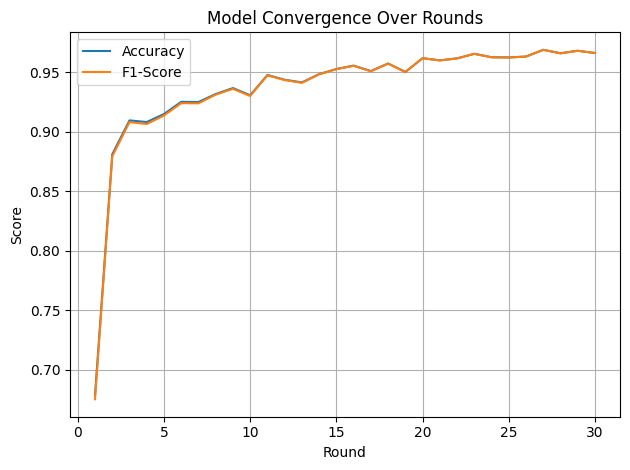

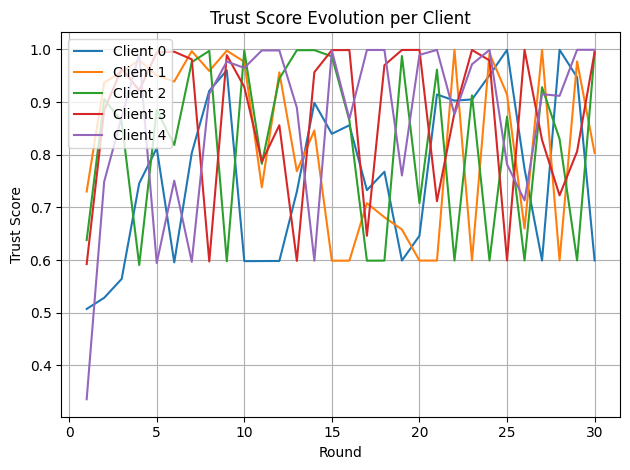

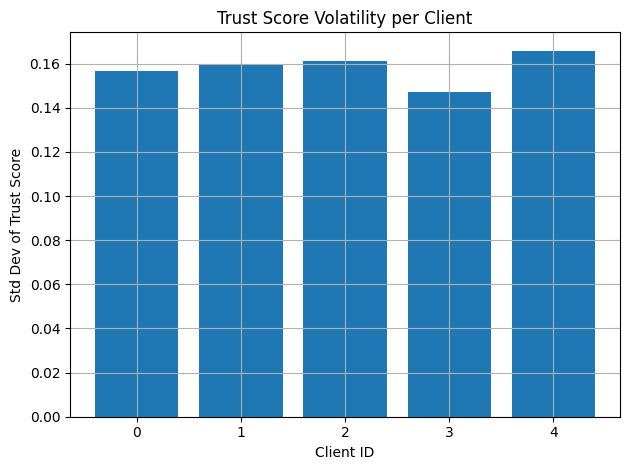

In [14]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = y_train_cat.shape[1]

def build_hybrid_model(input_shape, num_classes):
    model = Sequential()
    model.add(InputLayer(input_shape=input_shape))
    model.add(LSTM(64, activation='tanh', return_sequences=False, kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def compute_cosine_similarity(update1, update2):
    flat1 = np.concatenate([w.flatten() for w in update1])
    flat2 = np.concatenate([w.flatten() for w in update2])
    return 1 - cosine(flat1, flat2)

def compute_stability(client_updates, history):
    if len(history) < 2:
        return 1.0
    sims = [compute_cosine_similarity(client_updates, past) for past in history[-3:]]
    return np.mean(sims)

def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val + 1e-8)

def compute_trust_scores(client_updates_dict, global_weights, val_losses_dict, update_history_dict, alpha=(0.4, 0.4, 0.2)):
    scores = {}
    all_val_losses = list(val_losses_dict.values())
    min_loss, max_loss = min(all_val_losses), max(all_val_losses)

    for client_id, local_update in client_updates_dict.items():
        sim = compute_cosine_similarity(local_update, global_weights)
        val_loss = val_losses_dict[client_id]
        stability = compute_stability(local_update, update_history_dict.get(client_id, []))
        norm_val_loss = normalize(val_loss, min_loss, max_loss)
        trust = (alpha[0] * sim) + (alpha[1] * (1 - norm_val_loss)) + (alpha[2] * stability)
        scores[client_id] = trust
    return scores

def trust_weighted_aggregation(client_weights, trust_scores):
    total_trust = sum(trust_scores.values())
    new_global = [
        sum(trust_scores[cid] * np.array(client_weights[cid][i]) for cid in client_weights) / total_trust
        for i in range(len(next(iter(client_weights.values()))))
    ]
    return new_global

def evaluate_global_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    return accuracy, precision, recall, f1, cm

# Trust and metric logs
trust_log = []
round_metrics = []
communication_cost_log = []

def federated_learning_with_trust(X_train, y_train_cat, X_test, y_test_cat, num_clients=5, rounds=30):
    client_data = np.array_split(X_train, num_clients)
    client_labels = np.array_split(y_train_cat, num_clients)

    global_model = build_hybrid_model(input_shape, num_classes)
    global_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    global_weights = global_model.get_weights()

    update_history = {i: [] for i in range(num_clients)}

    for round in range(rounds):
        client_updates = {}
        val_losses = {}
        round_cost = 0

        for i in range(num_clients):
            local_model = build_hybrid_model(input_shape, num_classes)
            local_model.set_weights(global_weights)
            local_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
            local_model.fit(client_data[i], client_labels[i], epochs=1, batch_size=32, verbose=0)

            local_weights = local_model.get_weights()
            loss, _ = local_model.evaluate(X_test, y_test_cat, verbose=0)

            client_updates[i] = local_weights
            val_losses[i] = loss
            update_history[i].append(local_weights)

            # Compute communication cost per client
            round_cost += sum(w.nbytes for w in local_weights)

        trust_scores = compute_trust_scores(client_updates, global_weights, val_losses, update_history)

        for client_id, score in trust_scores.items():
            trust_log.append({
                'round': round + 1,
                'client_id': client_id,
                'trust_score': score
            })

        global_weights = trust_weighted_aggregation(client_updates, trust_scores)
        global_model.set_weights(global_weights)

        accuracy, precision, recall, f1, cm = evaluate_global_model(global_model, X_test, y_test_cat)
        print(f"Round {round + 1}")
        #print(f"Accuracy: {accuracy:.8f}, F1-Score: {f1:.8f}")
        print(f"Accuracy: {accuracy:.8f}, Precision: {precision:.8f}, Recall: {recall:.8f}, F1-Score: {f1:.8f}")
        print(f"Confusion Matrix:\n{cm}\n")

        round_metrics.append({'round': round + 1, 'accuracy': accuracy, 'f1': f1})
        communication_cost_log.append({'round': round + 1, 'comm_cost_MB': round_cost / (1024**2)})

    # Save logs
    pd.DataFrame(trust_log).to_csv("trust_scores_log.csv", index=False)
    pd.DataFrame(round_metrics).to_csv("round_metrics_log.csv", index=False)
    pd.DataFrame(communication_cost_log).to_csv("communication_cost_log.csv", index=False)

    # Plot accuracy and F1-score
    metric_df = pd.DataFrame(round_metrics)
    plt.plot(metric_df['round'], metric_df['accuracy'], label='Accuracy')
    plt.plot(metric_df['round'], metric_df['f1'], label='F1-Score')
    plt.title("Model Convergence Over Rounds")
    plt.xlabel("Round")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot trust score trends
    trust_df = pd.DataFrame(trust_log)
    for client_id in trust_df['client_id'].unique():
        client_data = trust_df[trust_df['client_id'] == client_id]
        plt.plot(client_data['round'], client_data['trust_score'], label=f'Client {client_id}')
    plt.xlabel("Round")
    plt.ylabel("Trust Score")
    plt.title("Trust Score Evolution per Client")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot trust score volatility (standard deviation over rounds)
    volatility = trust_df.groupby('client_id')['trust_score'].std().reset_index()
    plt.bar(volatility['client_id'], volatility['trust_score'])
    plt.title("Trust Score Volatility per Client")
    plt.xlabel("Client ID")
    plt.ylabel("Std Dev of Trust Score")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Execute
federated_learning_with_trust(X_train, y_train_cat, X_test, y_test_cat)